# Multi Plane 2D model
- Same as other Multi Plane but with [-0.5g, 1.5g]  instead of [-2g, 10g]
- Solves for however nk number of k:s
- Currently running tf = 50 and nu = 100 (dicretization of control)

In [1]:
%reset -f
import matplotlib.pyplot as plt
from casadi import *
import numpy as np

import importlib
import Model_2D_Package.Multi_Plane_2D_solver_tighter_constraint as model
importlib.reload(model)

<module 'Model_2D_Package.Multi_Plane_2D_solver_tighter_constraint' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\Model_2D\\Model_2D_Package\\Multi_Plane_2D_solver_tighter_constraint.py'>

Total number of variables............................:     1101
                     variables with only lower bounds:      201
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      200
Total number of equality constraints.................:     1000
Total number of inequality constraints...............:      402
        inequality constraints with only lower bounds:      202
   inequality constraints with lower and upper bounds:      200
        inequality constraints with only upper bounds:        0


Number of Iterations....: 298

                                   (scaled)                 (unscaled)
Objective...............:   3.1912717772983181e-09    3.1912717772983181e-09
Dual infeasibility......:   9.9999999781658300e-01    9.9999999781658300e-01
Constraint violation....:   2.1281672635314261e-02    2.1281672635314261e-02
Variable bound violation:   9.9922449758871323e-09    9.9922449758871323e-09
Complementar

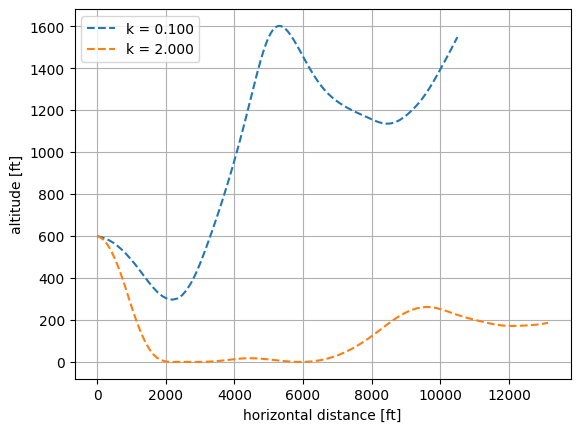

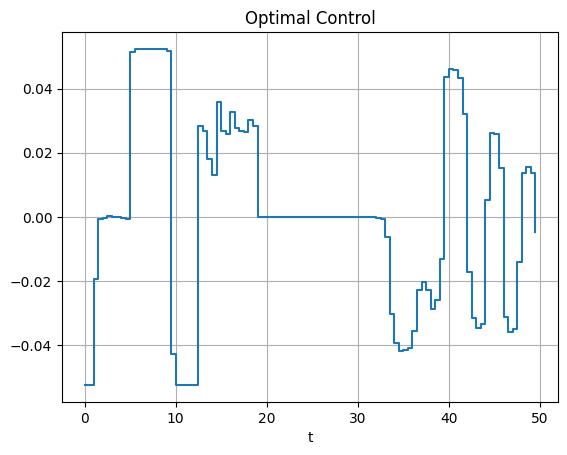

In [6]:
# what k are infeasible: 2.025 and above for
# but no longer feasible for ex [0.1, 2]

k_values=[0.1, 2]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)


# Multi Plane Solution

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 55

                                   (scaled)                 (unscaled)
Objective...............:  -4.8538229206346763e+01   -4.8538229206346763e+01
Dual infeasibility......:   1.5389782493720891e-10    1.5389782493720891e-10
Constraint violation....:   9.2663535637470222e-10    1.1141310096718371e-09
Variable bound violation:   9.9853547097517037e-09    9.9853547097517037e-09
Complementari

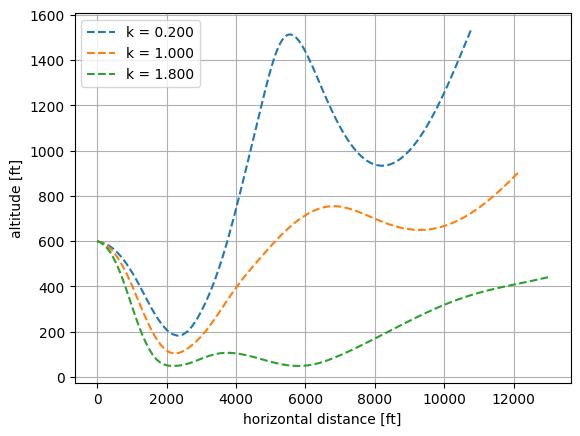

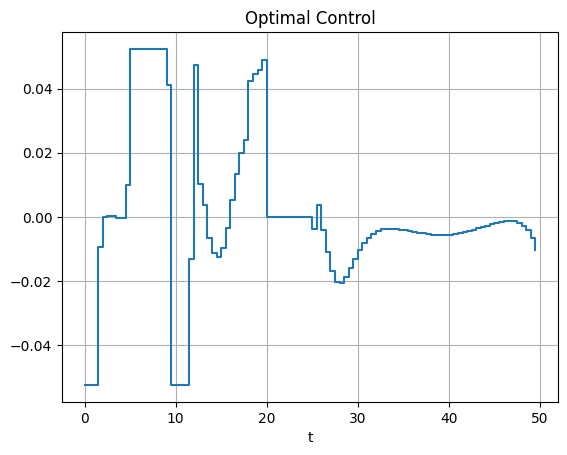

In [3]:
# k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
k_values=[0.2, 1, 1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

# MC Single Plane

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 33

                                   (scaled)                 (unscaled)
Objective...............:  -8.3472931266996085e+01   -8.3472931266996085e+01
Dual infeasibility......:   4.4092800635646180e-10    4.4092800635646180e-10
Constraint violation....:   2.1259438653942198e-11    2.1259438653942198e-11
Variable bound violation:   9.9521219598663890e-09    9.9521219598663890e-09
Complementari

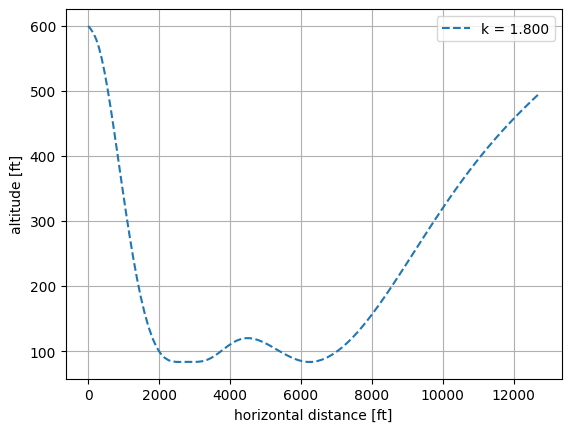

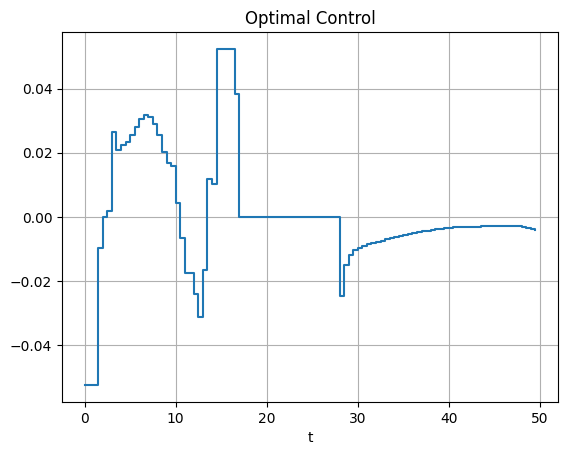

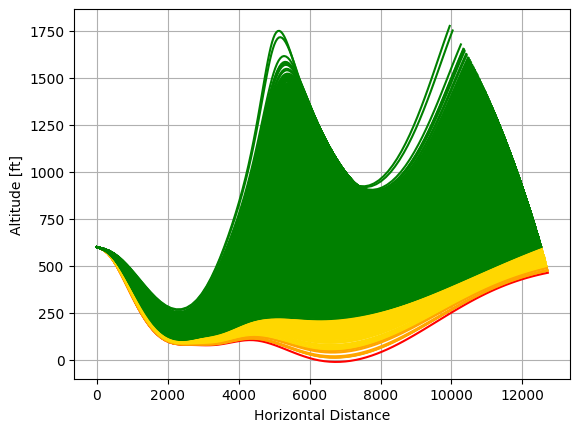

min k from sample: 0.021
max k from sample: 1.834
Minimum altitude over all runs: -9.717
Crash rate: 0.01%
Fail 50 feet rate: 0.08%
Fail 100 rate: 1.03%
x2dotdot < -0.5g: 449
x2dotdot > 1.5g: 0


In [13]:
k_values=[1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid=1)
# check for violations
print("x2dotdot < -0.5g:", len(violations['x2dotdot_low']))
print("x2dotdot > 1.5g:", len(violations['x2dotdot_high']))

# MC Multi Plane

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 55

                                   (scaled)                 (unscaled)
Objective...............:  -4.8538229206346763e+01   -4.8538229206346763e+01
Dual infeasibility......:   1.5389782493720891e-10    1.5389782493720891e-10
Constraint violation....:   9.2663535637470222e-10    1.1141310096718371e-09
Variable bound violation:   9.9853547097517037e-09    9.9853547097517037e-09
Complementari

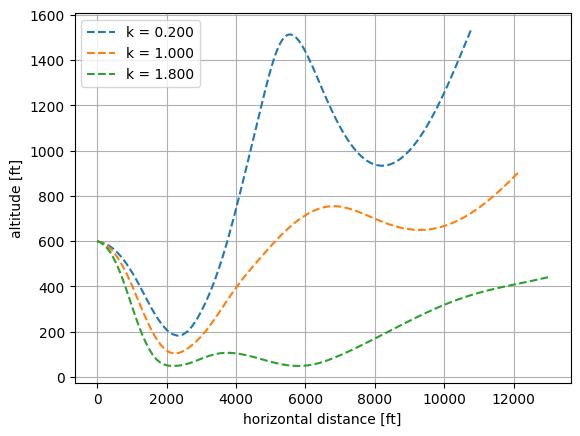

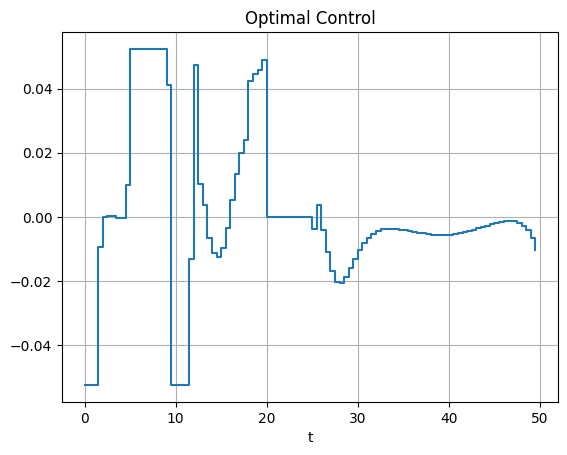

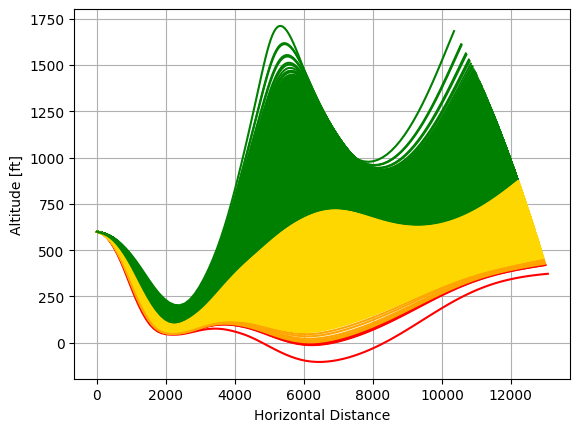

min k from sample: 0.017
max k from sample: 1.942
Minimum altitude over all runs: -103.755
Crash rate: 0.04%
Fail 50 feet rate: 0.1%
Fail 100 rate: 43.47%
x2dotdot < -0.5g: 53
x2dotdot > 1.5g: 0


In [15]:
#k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
k_values=[0.2, 1, 1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid=1)
# check for violations
print("x2dotdot < -0.5g:", len(violations['x2dotdot_low']))
print("x2dotdot > 1.5g:", len(violations['x2dotdot_high']))


With the old constraint of [-2g, 10g] resulted in only the largest k value having an effect on the result. But with the tighter constraint of [-0.5g, 2g] it now has an impact on the results

# Multi Plane with better initial guess

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 21

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924153728925501e+02   -5.0924153728925501e+02
Dual infeasibility......:   3.0951923965638163e-10    3.0951923965638163e-10
Constraint violation....:   6.3350284532255894e-12    7.6170181273482740e-12
Variable bound violation:   9.9580854118208606e-09    9.9580854118208606e-09
Complementari

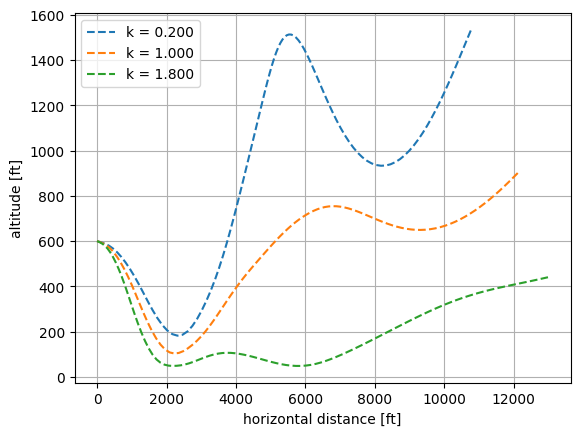

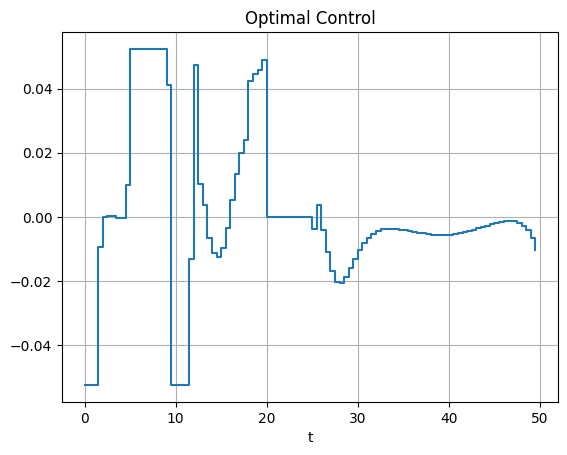

In [5]:
# Prep initial guess
w_opt,_ = model.solve_ocp_multi_plane_min_h([1])
x_opt = w_opt[model.params.nu+1:].tolist()
u_opt = w_opt[1:model.params.nu+1].tolist()

# solve multi plane problem
k_values=[0.2, 1, 1.8]
w_opt, _ = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt, u_opt)
# plot
model.plot_multi_plane_2D(w_opt,k_values)



#  Negative k values

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 166

                                   (scaled)                 (unscaled)
Objective...............:  -5.8919460204972791e+02   -5.8919460204972791e+02
Dual infeasibility......:   4.8895835019448777e-10    4.8895835019448777e-10
Constraint violation....:   3.3174271832272169e-10    3.9881342672742903e-10
Variable bound violation:   9.9572212836074314e-09    9.9572212836074314e-09
Complementar

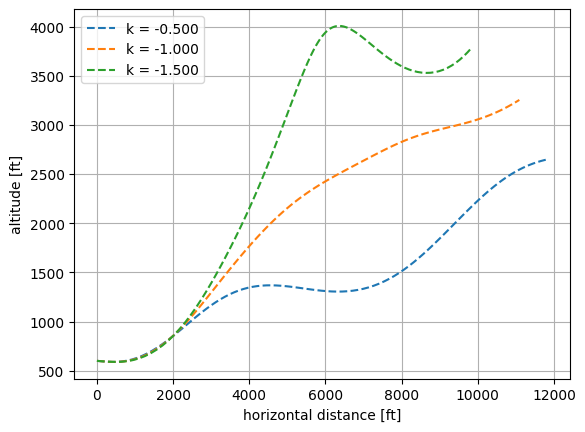

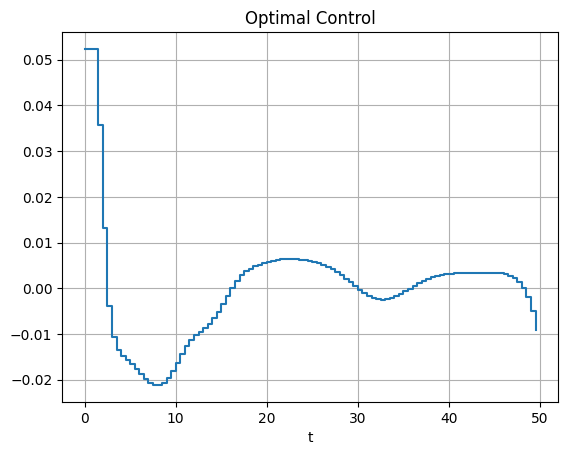

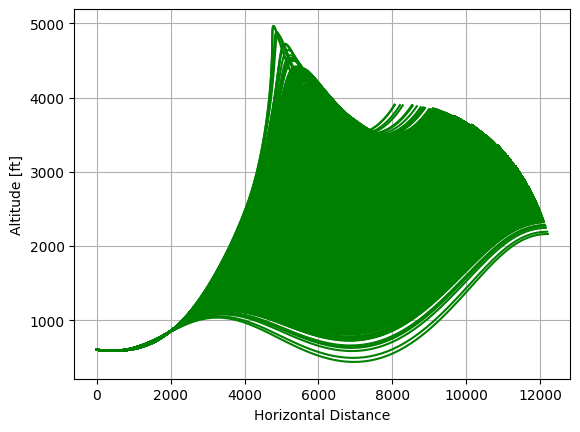

min k from sample: -1.937
max k from sample: -0.091
Minimum altitude over all runs: 437.716
Crash rate: 0.0%
Fail 50 feet rate: 0.0%
Fail 100 rate: 0.0%
x2dotdot < -0.5g: 126
x2dotdot > 1.5g: 0


In [18]:
k_values=[-0.5, -1, -1.5]
w_opt, _ = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid = -1)
# check for violations
print("x2dotdot < -0.5g:", len(violations['x2dotdot_low']))
print("x2dotdot > 1.5g:", len(violations['x2dotdot_high']))